# Task 1

In [42]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import numpy.linalg as linalg

def getPolynomialDataMatrix(x, degree):
    X = np.ones(x.shape)
    for i in range(1,degree+1):
        X = np.column_stack((X, x ** i))
    return X
    

def getWeightsForPolynomialFit(x,y,degree):
    X = getPolynomialDataMatrix(x, degree)

    XX = X.transpose().dot(X)
    w = np.linalg.solve(XX, X.transpose().dot(y))
    #print(w)
    return w

def sortPoly(para,X):
    sorting=[]
    for m in range(len(X)):
        sorting.append([para[m],X[m]])
    #print(sorting)
    sorting = sorted(sorting, key=lambda x: x[1])
    #print(sorting)
    for v in range(len(sorting)):
        para[v]=sorting[v][0]
        X[v]=sorting[v][1]
    return para, X

def split_data(x,y,split=0.7):
    data_size = len(x) #assuming x and y are the same length
    train_size=(int)(data_size*split)
    test_size=data_size-train_size
    test_full=False
    train_full=False
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    
    #splits the data
    for h in range(data_size):
        if(test_full):
            x_train.append(x[h])
            y_train.append(y[h])
            
        elif(train_full):
            x_test.append(x[h])
            y_test.append(y[h])
            
        else:
            r=random.randint(0,1) #randomly allocate data point to test or train
            if(r==0):
                x_train.append(x[h])
                y_train.append(y[h]) 
            else:
                x_test.append(x[h])
                y_test.append(y[h])
            
            #check if test or train are now full
            if(len(x_train)==train_size):
                train_full=True
            if(len(x_test)==test_size):
                test_full=True
        
    return x_train, x_test, y_train, y_test

In [52]:
def pol_regression(features_train, y_train, degree):
    if(degree == 0):
        
        #calc mean avg of y
        total=0
        for s in range(len(y_train)):
            total+=y_train[s]
        parameters = []
        parameters.append(total/len(y_train))
        
        #parameters = getWeightsForPolynomialFit(features_train,y_train, 1)
        #parameters = parameters[0]
        #print(parameters)
        #X = getPolynomialDataMatrix(features_train, 1)
        #parameters = []
        #for i in range(len(X)):
            #parameters.append(w[0])
    else:
        parameters = getWeightsForPolynomialFit(features_train,y_train,degree)
        #print(parameters)
        #print(w)
        #X = getPolynomialDataMatrix(features_train, degree)
        #print(X)
        #parameters = []
    
        #for i in range(len(X)):
            #Sum = 0
            #for j in range(len(w)):
                #Sum+=w[j]*X[i][j]
            
            #parameters.append(Sum)
            #print("Sum",Sum)
    
    return parameters

In [39]:
def eval_pol_regression(parameters, x, y, degree):
    
    x_train, x_test, y_train, y_test = split_data(x,y,0.7)
    
    
    para_train = pol_regression(x_train, y_train, degree)
    para_train, sX_train =sortPoly(para_train,x_train)

    para_test = pol_regression(x_test, y_test, degree)
    para_test, sX_test =sortPoly(para_test,x_test)
    
    plt.plot(sX_test[:],para_test[:])
    plt.plot(sX_train[:],para_train[:])
    plt.show()
    
    rmse=0
    
    return rmse

In [50]:
def predict_y(parameters, x, degree):
    X = getPolynomialDataMatrix(x, degree)
    #print(X)
    #print()
    #print(parameters)
    py = []
    
    for i in range(len(X)):
        Sum = 0
        for j in range(len(parameters)):
            print(i,j)
            -------
            Sum+=parameters[j]*X[i][j]
            
        py.append(Sum)
    return py

In [53]:
data = pd.read_csv('pol_regression.csv')
X=np.linspace(-5,5)

para = pol_regression(data.x, data.y, 0)
Y=predict_y(para, X, 0)
sY, sX =sortPoly(Y,X)
plt.plot(sX[:],sY[:])

para = pol_regression(data.x, data.y, 1)
Y=predict_y(para, X, 1)
sY, sX =sortPoly(Y,X)
plt.plot(sX[:],sY[:])

para = pol_regression(data.x, data.y, 2)
Y=predict_y(para, X, 2)
sY, sX =sortPoly(Y,X)
plt.plot(sX[:],sY[:])

para = pol_regression(data.x, data.y, 3)
Y=predict_y(para, X, 3)
sY, sX =sortPoly(Y,X)
plt.plot(sX[:],sY[:])

para = pol_regression(data.x, data.y, 5)
Y=predict_y(para, X, 5)
sY, sX =sortPoly(Y,X)
plt.plot(sX[:],sY[:])

para = pol_regression(data.x, data.y, 10)
Y=predict_y(para, X, 10)
sY, sX =sortPoly(Y,X)
plt.plot(sX[:],sY[:])

plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-5, 5)
plt.ylim(-200, 50)
plt.legend(('$x^0$','$x^1$', '$x^2$', '$x^3$', '$x^5$', '$x^{10}$', 'Points'), loc = 'lower right')

plt.show()

0 0


IndexError: invalid index to scalar variable.

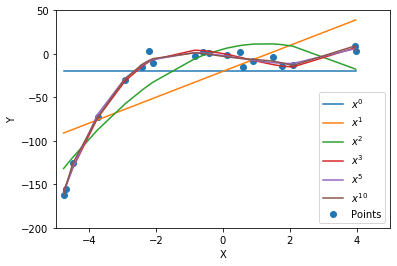

In [7]:
data = pd.read_csv('pol_regression.csv')

Y = []
for j in range(len(data.y)):
    Y.append(data.y[j])
#print(Y)
    
X = []
X0 = []
X1 = []
X2 = []
X3 = []
X5 = []
X10 = []
for j in range(len(data.x)):
    X.append(data.x[j])
    X0.append(data.x[j])
    X1.append(data.x[j])
    X2.append(data.x[j])
    X3.append(data.x[j])
    X5.append(data.x[j])
    X10.append(data.x[j])
    
para_0 = pol_regression(data.x, data.y, 0)
para_0, sX_0 =sortPoly(para_0,X0)


para_1 = pol_regression(data.x, data.y, 1)
para_1, sX_1 =sortPoly(para_1,X1)


para_2 = pol_regression(data.x, data.y, 2)
para_2, sX_2 =sortPoly(para_2,X2)


para_3 = pol_regression(data.x, data.y, 3)
para_3, sX_3 =sortPoly(para_3,X3)

para_5 = pol_regression(data.x, data.y, 5)
para_5, sX_5 =sortPoly(para_5,X5)


para_10 = pol_regression(data.x, data.y, 10)
para_10, sX_10 =sortPoly(para_10,X10)


plt.plot(sX_0[:],para_0[:])
plt.plot(sX_1[:],para_1[:])
plt.plot(sX_2[:],para_2[:])
plt.plot(sX_3[:],para_3[:])
plt.plot(sX_5[:],para_5[:])
plt.plot(sX_10[:],para_10[:])
plt.scatter(data.x[:],data.y[:])

plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-5, 5)
plt.ylim(-200, 50)
plt.legend(('$x^0$','$x^1$', '$x^2$', '$x^3$', '$x^5$', '$x^{10}$', 'Points'), loc = 'lower right')
plt.show()

# Task 2 

In [41]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def compute_euclidean_distance(vec_1, vec_2): #gets euclidean distance between two four dimensional co-ordinates
    distance = math.sqrt(((vec_1[0]-vec_2[0])**2)+
                         ((vec_1[1]-vec_2[1])**2)+
                         ((vec_1[2]-vec_2[2])**2)+
                         ((vec_1[3]-vec_2[3])**2))
    
    return distance #return calculated distance


In [40]:
def initialise_centroids(dataset,k):
    #name axis (helps with code readability)
    X=data.height
    Y=data.tail_length
    Z=data.leg_length
    W=data.nose_circumference
    
    #get the biggest and smallest values for each axis
    x_min, x_max = X[:].min(), X[:].max()
    y_min, y_max = Y[:].min(), Y[:].max()
    z_min, z_max = Z[:].min(), Z[:].max()
    w_min, w_max = W[:].min(), W[:].max()
    
    #create k number of randomly placed centroids (within the min-max range of the respective axis)
    centroids = []
    for c in range(k):
        centroids.append([random.uniform(x_min,x_max),
                          random.uniform(y_min,y_max),
                          random.uniform(z_min,z_max),
                          random.uniform(w_min,w_max)])
    
    return centroids #return list of centroids


In [36]:
def kmeans(dataset,k):   
    #generate randomly placed centroids
    centroids = initialise_centroids(dataset,k) 
    #get the size of the data set (each axis is the same length so which one is used is arbitrary)
    data_size = len(dataset.tail_length)
    
    #build list that stores the assigned cluster for each data point to be the correct size
    cluster_assigned=[]
    for i in range(data_size):
        cluster_assigned.append(0)
    
    #re-define axis to allow code to be more readable
    X=data.height
    Y=data.tail_length
    Z=data.leg_length
    W=data.nose_circumference
        
    converging=True #indicates whether the centroids are still converging or not
    change=False #indicates if any data point has changed cluster
    
    #measure objective function using sum of squared estimate of errors (SSE)
    SSEs = [] #list of SSEs
    steps= [] #list containing each step number (might as well fill it in whilst clustering instead of afterwards)
    
    min_iterations = 10 #require a minium number of iterations
    iteration_count = 0 #current iteration number

    #while clusters are still converging and the minimum number of iterations hasn't been reached
    while converging or (iteration_count < min_iterations): 
        change=False #reset whether any data points have changed cluster
        
        clusterTotals=[] #used for calculating new centroid location (stores sum of each member data point for every cluster)
        for d in range(4): #for each dimension
            clusterTotals.append([])
            for K in range(k): #for each centroid
                clusterTotals[d].append(0)
                
        sse = 0 #sum of squared errors for current iteration

        for i in range(data_size): #for each data point
            distances=[] #list of distances from data point to centroids
        
            for c in range(k):
                item=[X[i],Y[i],Z[i],W[i]] #assemble the data point into its own list
                dist=compute_euclidean_distance(item,centroids[c])
                distances.append(dist)
            
            #uses the distance between the data point and it's closest centroid 
            sse+=min(distances)**2
            
            #if previous label not the same as new label change label
            if(cluster_assigned[i]!=distances.index(min(distances))): 
                cluster_assigned[i]=distances.index(min(distances))
                change=True
                
            #increment cluster total on each axis
            clusterTotals[0][cluster_assigned[i]]+=X[i]
            clusterTotals[1][cluster_assigned[i]]+=Y[i]
            clusterTotals[2][cluster_assigned[i]]+=Z[i]
            clusterTotals[3][cluster_assigned[i]]+=W[i]

        
        #build list of correct length
        clusterTally=[]
        for g in range(k):
            clusterTally.append(0) 
    
        for g in range(len(cluster_assigned)):
            clusterTally[cluster_assigned[g]]+=1 #counts the number of members for each cluster
        
        #if any of the cluster tallys are 0 assign the closest data point to that cluster (prevents division by 0 error)
        for a in range(len(clusterTally)):
            if (clusterTally[a]==0):
                print("Orphan Centroid Detected")
                #list of distances to data points
                pointContenders=[]                 
                for h in range(data_size):
                    item=[X[h],Y[h],Z[h],W[h]] #assemble the data point into its own list
                    dist=compute_euclidean_distance(item,centroids[a])
                    pointContenders.append(dist)
                #update corresponding information
                index = pointContenders.index(min(pointContenders))
                cluster_assigned[index]=a
                clusterTally[a]+=1
                clusterTotals[0][a]+=X[index]
                clusterTotals[1][a]+=Y[index]
                clusterTotals[2][a]+=Z[index]
                clusterTotals[3][a]+=W[index]
                change=True
                    
        #for each cluster divide axis total by number of members
        for n in range(k):
            centroids[n][0]=clusterTotals[0][n]/clusterTally[n]
            centroids[n][1]=clusterTotals[1][n]/clusterTally[n]
            centroids[n][2]=clusterTotals[2][n]/clusterTally[n]
            centroids[n][3]=clusterTotals[3][n]/clusterTally[n]
        
        iteration_count+=1 #increment iteration number
        SSEs.append(sse) #add SSE to list of SSEs
        steps.append(iteration_count) #add iteration number to list of iterations
        
        if(not change): #if there were no label changes convergence is complete
            converging=False
        
        
    #plot line graph of SSE against step/iteration number    
    centroids = np.array(centroids)
    
    plt.plot(steps[:],SSEs[:])
    plt.scatter(steps[:],SSEs[:], c='#ff0000')
    plt.xlabel('Steps')
    plt.ylabel('SSE')

    plt.xticks(())
    plt.yticks(())
    plt.show()
    
        
    return centroids, cluster_assigned

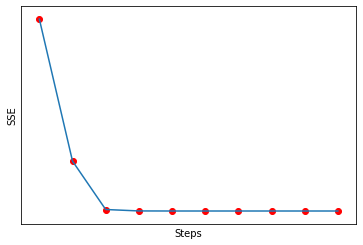

Done


In [62]:
data = pd.read_csv('CMP3751M_CMP9772M_ML_Assignment 1_Task2 - dataset - dog breeds.csv')
data.columns=['height','tail_length','leg_length','nose_circumference']
dimensions= len(data.keys())

k=2

centroids, cluster_assigned = kmeans(data,k)

#used for scatter graph bounds, .5 is for nice spacing on those graphs
x_min, x_max = data.height[:].min() - .5, data.height[:].max() + .5
y_min, y_max = data.tail_length[:].min() - .5, data.tail_length[:].max() + .5
z_min, z_max = data.leg_length[:].min() - .5, data.leg_length[:].max() + .5
w_min, w_max = data.nose_circumference[:].min() - .5, data.nose_circumference[:].max() + .5

print("Done")

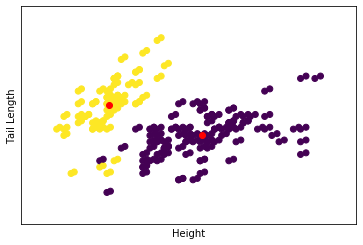

In [63]:
plt.figure()
plt.clf()

plt.scatter(data.height[:], data.tail_length[:], c=cluster_assigned)
plt.scatter(centroids[:,0],centroids[:,1], c='#ff0000')
plt.xlabel('Height')
plt.ylabel('Tail Length')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

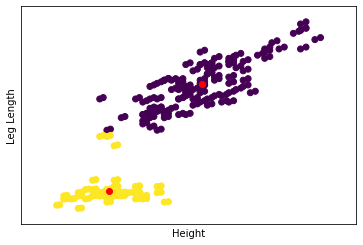

In [64]:
plt.scatter(data.height[:], data.leg_length[:], c=cluster_assigned)
plt.scatter(centroids[:,0],centroids[:,2], c='#ff0000')
plt.xlabel('Height')
plt.ylabel('Leg Length')

plt.xlim(x_min, x_max)
plt.ylim(z_min, z_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [200]:
#data = pd.read_csv('kmeans.csv')
data = pd.read_csv('CMP3751M_CMP9772M_ML_Assignment 1_Task2 - dataset - dog breeds.csv')
#data.columns=['x','y']
data.columns=['height','tail_length','leg_length','nose_circumference']
print("DATA KEYS")
print (data.keys())
dimensions= len(data.keys())
print(dimensions)
X=data.height
Y=data.tail_length
Z=data.leg_length
W=data.nose_circumference

#used to graph bounds, .5 is for nice spacing on graph
x_min, x_max = X[:].min() - .5, X[:].max() + .5
y_min, y_max = Y[:].min() - .5, Y[:].max() + .5
z_min, z_max = Z[:].min() - .5, Z[:].max() + .5
w_min, w_max = W[:].min() - .5, W[:].max() + .5


centroidsX=[]
centroidsY=[]
centroidsZ=[]
centroidsW=[]
labels=[]
for i in range(len(X)):
    labels.append(0)
    
n_clusters=3

for c in range(n_clusters):
    centroidsX.append(random.uniform(x_min,x_max))
    centroidsY.append(random.uniform(y_min,y_max))
    
print("CENTROIDS")
print(centroidsX)
print(centroidsY)
print('\n')
converging=True
change=False

while converging: #add minimum number of iterations
    change=False
    clusterTotalX=[]
    clusterTotalY=[]
    for k in range(n_clusters):
        clusterTotalX.append(0)
        clusterTotalY.append(0)
    for i in range(len(X)):
        distances=[]
        
        for c in range(n_clusters):
            distances.append(compute_euclidean_distance([X[i],Y[i]], [centroidsX[c],centroidsY[c]]))
            #distances.append(math.sqrt(((X[i]-centroidsX[c])**2)+((Y[i]-centroidsY[c])**2))) #get euclid distance
        #print("DISTANCES")
        #print(distances)
        #print("ALERT")
        #print("Label: ",labels[i])
        #print("Min Distance: ",min(distances))
        #print("Index of Min Distance (AKA New Label): ",distances.index(min(distances)))
        #print("\n")
        if(labels[i]!=distances.index(min(distances))): #if previous label not the same as new label change label
            labels[i]=distances.index(min(distances))
            change=True
        
        clusterTotalX[labels[i]]+=X[i]
        clusterTotalY[labels[i]]+=Y[i]
        #print("CLUSTER TOTALS")
        #print(clusterTotalX)
        #print(clusterTotalY)
        #print("\n")
    
    print("CLUSTER UPDATED TOTALS")
    print(clusterTotalX)
    print(clusterTotalY)
    print("\n")
    clusterTally=[]
    for g in range(n_clusters):
        clusterTally.append(0) 
    
    for g in range(len(labels)):
        clusterTally[labels[g]]+=1 
        
    #if any of the cluster tallys are 0 assign the closest data point to that cluster (prevents division by 0 error)
        
    print("CLUSTER TALLY")
    print(clusterTally)
    print("\n")
    
    for n in range(n_clusters):
        centroidsX[n]=clusterTotalX[n]/clusterTally[n]#len(X)
        centroidsY[n]=clusterTotalY[n]/clusterTally[n]#len(Y)
    
    print("LABELS AND NEW CENTROIDS")
    print(labels)
    print(centroidsX)
    print(centroidsY)
    print('\n#######################################################################################')
    
    if(not change): #if there were no label changes convergence is complete
        converging=False
        
        
        
        
        
        
plt.figure()
plt.clf()

plt.scatter(X[:], Y[:], c=labels)
plt.scatter(centroidsX[:],centroidsY[:], c='#ff0000')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

DATA KEYS
Index(['height', 'tail_length', 'leg_length', 'nose_circumference'], dtype='object')
4
CENTROIDS
[4.337815372493533, 6.767376157466294, 5.458372727240073]
[2.4062977134824655, 4.0531385620750395, 3.1635683973929556]




IndexError: list index out of range